# Movies Watched by Release
> How many movies have I watched by release year/day/month?

- toc:true
- badges: true
- author: Sanyam Kapoor
- categories: [movies, barplot]

In [1]:
#collapse-hide

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2., style='whitegrid')

In [2]:
#collapse-hide

import sys
from pathlib import Path

plotfiles_module_path = Path('.') / '..' / 'src'

if plotfiles_module_path not in sys.path:
  sys.path.insert(0, str(plotfiles_module_path.resolve()))

from plotfiles.dataset import load_movies

movies = load_movies()

## Release Year of Movies Watched

In [3]:
#collapse-hide

count_by_year = movies.groupby('release_year')['id'].count().reset_index()

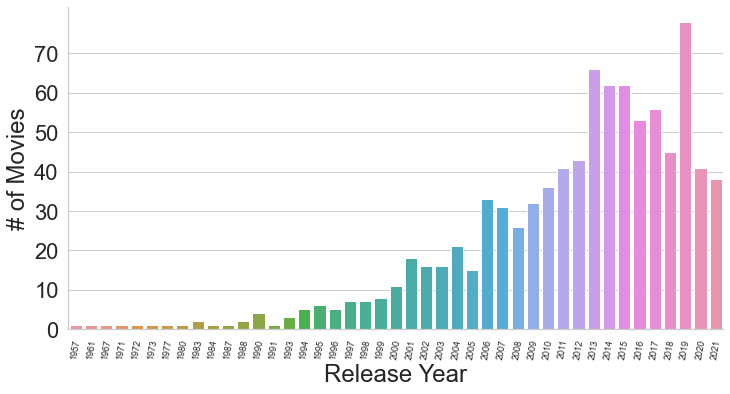

In [4]:
#collapse-hide

g = sns.catplot(data=count_by_year, x='release_year', y='id', kind='bar',
                dodge=False, height=6, aspect=16/9)

g.set(xlabel='Release Year', ylabel='# of Movies', yticks=range(0, 80, 10))
g.set_xticklabels(g.ax.get_xticklabels(), rotation=80, fontdict=dict(size=9))

g.fig.tight_layout()

## Release Day of Movies Watched

In [5]:
#collapse-hide

import calendar

days_dict = dict(zip(calendar.day_name[0:], calendar.day_abbr[0:]))

count_by_day = movies.groupby('release_day')['id'].count().reset_index()
count_by_day.release_day = count_by_day.release_day.apply(lambda d: days_dict[d])

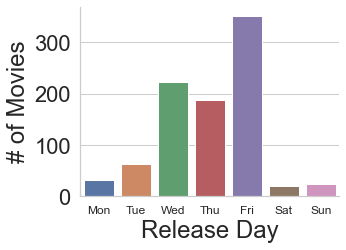

In [6]:
#collapse-hide

g = sns.catplot(data=count_by_day, x='release_day', y='id', kind='bar',
                order=calendar.day_abbr[0:],
                dodge=False, height=4, aspect=4/3)

g.set(xlabel='Release Day', ylabel='# of Movies')
g.set_xticklabels(g.ax.get_xticklabels(), fontdict=dict(size=12))

g.fig.tight_layout()

## Release Month of Movies Watched

In [7]:
#collapse-hide

import calendar

months_dict = dict(zip(calendar.month_name[1:], calendar.month_abbr[1:]))

count_by_month = movies.groupby('release_month')['id'].count().reset_index()
count_by_month.release_month = count_by_month.release_month.apply(lambda m: months_dict[m])

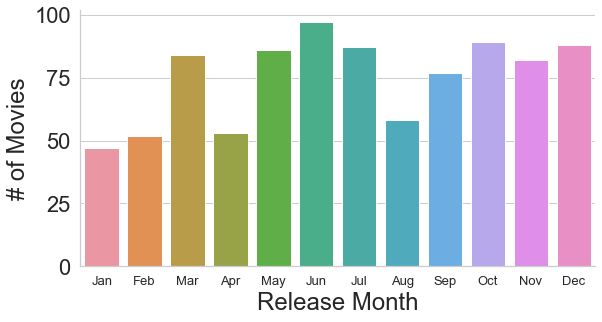

In [8]:
#collapse-hide

g = sns.catplot(data=count_by_month, x='release_month', y='id', kind='bar',
                order=calendar.month_abbr[1:], dodge=False, height=5, aspect=16/9)

g.set(xlabel='Release Month', ylabel='# of Movies')
g.set_xticklabels(g.ax.get_xticklabels(), fontdict=dict(size=13))

g.fig.tight_layout()